# PH2255 Week 18. Statistical Data Analysis 2.

Generic Python header: here the interactive/inline plotting style is selected, relevant libraries are imported, python2/3 compatibility is addressed.

In [40]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import chi2
import matplotlib
import matplotlib.pyplot as plt

# Exercise 2. Analysis of Galileo’s ball and ramp data

In this exercise we consider an experiment performed by Galileo using a ball and an inclined ramp.
The ball starts at a height $h$ above the edge of the ramp, and its trajectory is forced to be horizontal
before it falls over the edge. The horizontal distance $d$ from the edge to the point of impact is measured for different values of $h$:

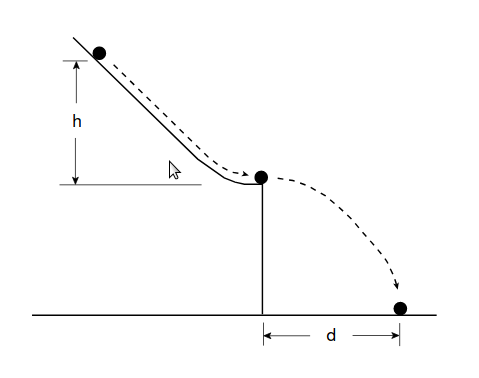

Five data points obtained by Galileo in 1608 are

In [2]:
h   = np.array([1000., 828.,  800.,  600.,  300.])
d   = np.array([1500., 1340., 1328., 1172., 800.])
sig = np.array([15.,   15.,   15.,   15.,   15.])

The units are punti (points); one punto is slightly less than 1 mm.
We will assume that $h$ is known with negligible error, and that the $d$ have uncertainties of $\sigma = 15$ punti (points).

We could proceed by applying the known laws of mechanics to the system and deriving the relationship between $d$ and $h$.
For purposes of this exercise, however, we will pretend we do not yet know Newton’s laws (as was the case for Galileo),
and we will simply try different hypotheses and compare their predictions with the data.
Consider the following three hypotheses for the functional relationship between $d$ and $h$:
1. a linear relation with a single free parameter $\alpha$,
$$d=\alpha h,$$
2. a quadratic relation with two parameters, $\alpha$ and $\beta$,
$$d=\alpha h+\beta h^2,$$
3. and something which is a nonlinear function of the parameters:
$$d = \alpha h^\beta.$$

For hypothesis 1 the fit function can be defined as:

In [4]:
# define fit function
def func1(h, *theta):
    alpha, = theta
    return alpha*h

## Exercise 2(a).
Define fit functions for all the hypotheses listed above.
Carry out a least-squares fit of the parameters for each hypothesis.
Find the estimated parameter values, their standard deviations and if relevant their covariance. 
You may find the Python code you developed for Exercise 1 from Week 17 useful.

In [31]:
# Exercise 1a

# First hypothesis
def f1(h, *vars):
    a, = vars
    return a*h

## Curve fit
p0_1 = np.array([1.0])
theta_hat_1, covariance_1 = curve_fit(f1, h, d, p0_1, sig, absolute_sigma=True)

## Standard deviation of parameters
theta_hat_1_std_dev = np.sqrt(np.diag(covariance_1))


# Second hypothesis
def f2(h, *vars):
    a, b = vars
    return a*h + b*h**2

## Curve fit
p0_2 = np.array([1.0, 1.0])
theta_hat_2, covariance_2 = curve_fit(f2, h, d, p0_2, sig, absolute_sigma=True)

## Standard deviation of parameters
theta_hat_2_std_dev = np.sqrt(np.diag(covariance_2))

# Third hypothesis
def f3(h, *vars):
    a, b = vars
    return a*h**b

## Curve fit
p0_3 = np.array([1.0, 1.0])
theta_hat_3, covariance_3 = curve_fit(f3, h, d, p0_3, sig, absolute_sigma=True)

## Standard deviation of parameters
theta_hat_3_std_dev = np.sqrt(np.diag(covariance_3))

## Exercise 2(b).
Produce plots of the fitted curves along with the data points and their errors.

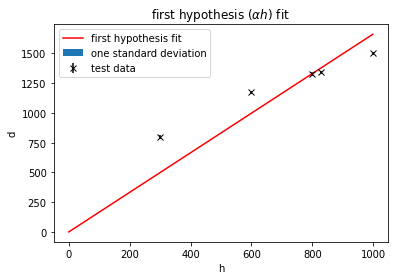

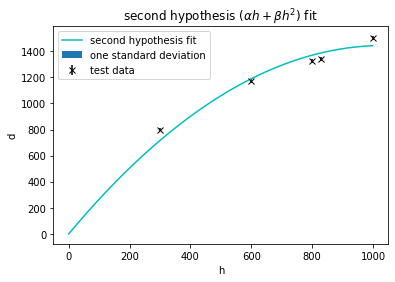

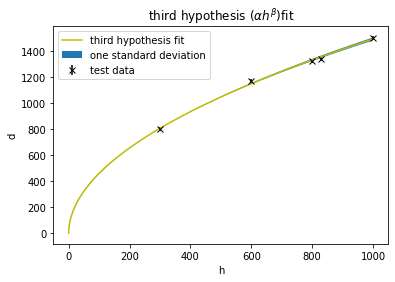

In [35]:
# Exercise 2b

## Setup Plots
fig1 = plt.figure()
fig2 = plt.figure()
fig3 = plt.figure()
ax1 = fig1.add_subplot()
ax1.set_title('first hypothesis ($\\alpha h$) fit')
ax2 = fig2.add_subplot()
ax2.set_title('second hypothesis ($\\alpha h+\\beta h^2$) fit')
ax3 = fig3.add_subplot()
ax3.set_title('third hypothesis ($\\alpha h^\\beta$)fit')
ax1.set_ylabel("d")
ax2.set_ylabel("d")
ax3.set_ylabel("d")
ax1.set_xlabel("h")
ax2.set_xlabel("h")
ax3.set_xlabel("h")

h_val = np.arange(0, 1000, 1)

def std_dev(h, cov): return np.sqrt(sum([(h**(i+j))*cov[i][j] for i in range(len(cov)) for j in range(len(cov))]))

## Given Data
ax1.errorbar(h, d, yerr=sig, fmt='kx', label="test data")
ax2.errorbar(h, d, yerr=sig, fmt='kx', label="test data")
ax3.errorbar(h, d, yerr=sig, fmt='kx', label="test data")

## Plot the three fits
fit1 = np.vectorize(lambda h, a: a*h)
ax1.plot(h_val, fit1(h_val, theta_hat_1), 'r', label="first hypothesis fit")
ax1.fill_between(h_val, fit1(h_val, theta_hat_1)-std_dev(h_val, covariance_1), fit1(h_val, theta_hat_1)+std_dev(h_val, covariance_1), label="one standard deviation")
ax1.legend()

fit2 = np.vectorize(lambda h, a, b: a*h + b*h**2)
ax2.plot(h_val, fit2(h_val, *theta_hat_2), 'c', label="second hypothesis fit")
ax2.fill_between(h_val, fit2(h_val, *theta_hat_2)-std_dev(h_val, covariance_2), fit2(h_val, *theta_hat_2)+std_dev(h_val, covariance_2), label="one standard deviation")
ax2.legend()

fit3 = np.vectorize(lambda h, a, b: a*h**b)
ax3.plot(h_val, fit3(h_val, *theta_hat_3), 'y', label="third hypothesis fit")
ax3.fill_between(h_val, fit3(h_val, *theta_hat_3)-std_dev(h_val, covariance_3), fit3(h_val, *theta_hat_3)+std_dev(h_val, covariance_3), label="one standard deviation")
ax3.legend()

## Exercise 2(c).
Quantify the level of agreement between the data and each hypothesis with both a $p$-value and the chi-squared per degree of freedom.
Discuss which of the hypotheses are disfavoured and which are preferred.

You may find the code provided for Exercise 1 from Week 17 useful for evaluating $\chi^2$ and the number of degrees of freedom. 
The $p$-value is defined as the probability that $\chi^2$ is equal to or larger than the measured value.
If `chisq` is the measured $\chi^2$ and `ndof` is the number of degrees of freedom, the $p$-value can be obtained using the following code:

In [ ]:
print ("p-value = ", scipy.stats.chi2.sf(chisq, df=ndof))

In [44]:
# Exercise 2c

## Hypothesis 1
chi_sq_min_1 = sum(((d - f1(h, *theta_hat_1))/sig)**2)
ndof_1 = len(h)-len(p0_1)
print(f"---Hypothesis 1---\nChi-sq-min/NDoF:\t{chi_sq_min_1/ndof_1}\np-value:\t\t{chi2.sf(chi_sq_min_1, df=ndof_1)}")

## Hypothesis 2
chi_sq_min_2 = sum(((d - f2(h, *theta_hat_2))/sig)**2)
ndof_2 = len(h)-len(p0_2)
print(f"---Hypothesis 2---\nChi-sq-min/NDoF:\t{chi_sq_min_2/ndof_2}\np-value:\t\t{chi2.sf(chi_sq_min_2, df=ndof_2)}")

## Hypothesis 3
chi_sq_min_3 = sum(((d - f3(h, *theta_hat_3))/sig)**2)
ndof_3 = len(h)-len(p0_3)
print(f"---Hypothesis 3---\nChi-sq-min/NDoF:\t{chi_sq_min_3/ndof_3}\np-value:\t\t{chi2.sf(chi_sq_min_3, df=ndof_3)}")


---Hypothesis 1---
Chi-sq-min/NDoF:	165.49753617897267
p-value:		5.912867886616111e-142
---Hypothesis 2---
Chi-sq-min/NDoF:	21.58060512007567
p-value:		5.696198137767403e-14
---Hypothesis 3---
Chi-sq-min/NDoF:	1.2519761533914748
p-value:		0.2890541749901745


## Exercise 2(d).
Use Newton’s Laws to derive the relation between $d$ and $h$.
Discuss how you would compare this prediction to the fit results obtained above.
What parameters of the system can be related using your theoretical prediction to the fitted parameters?
What important experimental uncertainties could render such a comparison difficult?

Suggestions: ignore air resistance; take the height of the table to be $H$;
use punti as the units of length in your calculations.

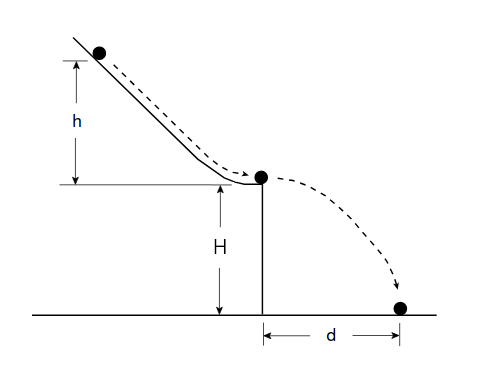

Conservation of energy: energy at top of the ramp = energy at bottom of the ramp

Energy at top of ramp: $E_{\text{grav}} = mgh$

Energy at bottom of ramp: $E_{\text{translation}}+E_{\text{rotation}} = \frac12mv^2 + \frac12I\omega^2 = \frac12mv^2 + \frac12kmv^2$

Using Moment of inertia for a sphere: $I=\frac25mr^2$

$\therefore mgh=\frac12mv^2+\frac12kmv^2$

Using projectile motion $x=vt$ 

$\therefore mgh = \frac12m\left(\frac xt\right)^2 +\frac12 \frac25 m\left(\frac xt\right)^2$

$\therefore \frac{x^2}{t^2}=10gh/7$

Using time of flight $H=\frac12gt^2$

$\therefore x^2 = \left(\frac{10gh}{7}\right)\left(\frac H{\frac12g}\right)$


$\therefore x=(10Hh/3.5)^\frac12$

If we set $\alpha=10H/3.5$ and $\beta=\frac12$, we get $x=\alpha h^\beta$

With $x=d$, this fits the third hypothesis

The third hypothesis also had the $\chi^2_\text{min}$ value closest to $1$, and the highest p-value, leading us to conclude that this theory is correct.

19/01/2021. This Jupyter notebook was assembled by Lev Levitin based on course written by Glen Cowan.
